### Importing Libraries.

In [270]:
!pip3 install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
from math import sqrt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.metrics import mean_squared_error as MSE

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import itertools
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 22,10

# For time series analysis:
!pip3 install pmdarima
import pmdarima as pm

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

### Checking charts.csv for max unique songs and entries in dataset.

In [ ]:
full_df = pd.read_csv("/content/drive/MyDrive/ML-Project/data/charts.csv")
#full_df = pd.read_csv("/content/drive/MyDrive/ML-Project/top200_9countries_plain.csv")

In [ ]:
print("Unique Songs: ", len(list(full_df['title'].unique())))

Unique Songs:  161080


In [ ]:
full_df.columns

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
       'streams'],
      dtype='object')

In [ ]:
full_df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Despacito (Featuring Daddy Yankee),1,2017-03-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,365941.0
1,El Amante,2,2017-03-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,SAME_POSITION,179697.0
2,Reggaetón Lento (Bailemos),3,2017-03-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,SAME_POSITION,169647.0
3,Shape of You,4,2017-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,SAME_POSITION,168495.0
4,Chantaje (feat. Maluma),5,2017-03-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,141696.0


In [ ]:
full_df['region'].unique()

array(['Canada', 'Belgium', 'Denmark', 'France', 'Ireland', 'Italy',
       'Sweden', 'United Kingdom'], dtype=object)

In [ ]:
#country_list = ['United States', 'Canada', 'Ireland', 'Germany', 'United Kingdom']
country_list = list(full_df['region'].unique())
unique_songs_count = [] 
total_entries_count = []

for x in country_list:
    #print(x)
    total_entries = len(full_df[full_df['region'] == x])
    #print("Region len: ", total_entries)
    total_entries_count.append(total_entries)
    unique_songs = len(full_df[full_df['region'] == x]['title'].unique())
    unique_songs_count.append(unique_songs)
    #print("Unique songs: ", unique_songs)

In [ ]:
country_entries = {'region' : country_list, 'unique_songs' : unique_songs_count, 'total_entries' : total_entries_count}
df_dist = pd.DataFrame.from_dict(country_entries)

In [ ]:
top20_uniquesongs_regions = df_dist.sort_values(by = ['unique_songs'], ascending = False)
top20_uniquesongs_regions = top20_uniquesongs_regions.head(20)

In [ ]:
top20_totalentries_regions = df_dist.sort_values(by = ['total_entries'], ascending = False)
top20_totalentries_regions = top20_totalentries_regions.head(20)

In [ ]:
len(list(set(list(top20_uniquesongs_regions['region'])).intersection(top20_totalentries_regions['region'])))

10

In [ ]:
chosen_countries = list(set(list(top20_uniquesongs_regions['region'])).intersection(top20_totalentries_regions['region']))

### Fetching TOP200 Data

Filtered by the list of countries with the most entries & individual songs (diverse taste?)

In [ ]:
top200 = full_df[full_df['chart'] == "top200"]

In [ ]:
top200.isnull().sum()

title      7
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
dtype: int64

In [ ]:
top200 = top200[top200['title'].notna()]

In [ ]:
top200.isnull().sum()

title      0
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
dtype: int64

In [ ]:
#country_list = ['United States', 'Canada', 'Ireland', 'Germany', 'United Kingdom']
country_list = list(top200['region'].unique())
unique_songs_count = [] 
total_entries_count = []

for x in country_list:
    #print(x)
    total_entries = len(top200[top200['region'] == x])
    #print("Region len: ", total_entries)
    total_entries_count.append(total_entries)
    unique_songs = len(top200[top200['region'] == x]['title'].unique())
    unique_songs_count.append(unique_songs)
    #print("Unique songs: ", unique_songs)

In [ ]:
country_entries = {'region' : country_list, 'unique_songs' : unique_songs_count, 'total_entries' : total_entries_count}
df_dist = pd.DataFrame.from_dict(country_entries)

In [ ]:
top20_uniquesongs_regions = df_dist.sort_values(by = ['unique_songs'], ascending = False)
top20_uniquesongs_regions = top20_uniquesongs_regions.head(20)

In [ ]:
top20_totalentries_regions = df_dist.sort_values(by = ['total_entries'], ascending = False)
top20_totalentries_regions = top20_totalentries_regions.head(20)

In [ ]:
chosen_countries = list(set(list(top20_uniquesongs_regions['region'])).intersection(top20_totalentries_regions['region']))

In [ ]:
chosen_countries

['Canada',
 'Sweden',
 'United States',
 'France',
 'Ireland',
 'Denmark',
 'United Kingdom',
 'Belgium',
 'Italy']

In [ ]:
top200 = top200[(top200['region'] == 'Canada')|(top200['region'] == 'Sweden')|(top200['region'] == 'Belgium')|(top200['region'] == 'Italy')|(top200['region'] == 'Unites States')|(top200['region'] == 'United Kingdom')|(top200['region'] == 'Denmark')|(top200['region'] == 'France')|(top200['region'] == 'Ireland')]


In [ ]:
len(top200)

2819112

In [ ]:
top200.head(1)

,title,rank,date,artist,url,region,chart,trend,streams
203,Sorry,151,2017-03-01,Future,https://open.spotify.com/track/1gb6riq7CCP5clG...,Canada,top200,MOVE_DOWN,20827.0


In [ ]:
top200['id'] = top200['url'].apply(lambda x: x.split('/')[4])
top200.drop('url',axis=1,inplace=True)

In [ ]:
top200.head(1)

,title,rank,date,artist,region,chart,trend,streams,id
203,Sorry,151,2017-03-01,Future,Canada,top200,MOVE_DOWN,20827.0,1gb6riq7CCP5clGpSD0XPH


In [ ]:
#top200.to_csv('data/top200_9countries_plain.csv')

In [ ]:
client_id = '7ac5c16c450e4d59bd2e9cb28dd6f81b'
client_secret = '3811b847b45d4b6282ecc6a8a11878ad'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
song_meta={'id':[],'album':[], 'artist':[], 'explicit':[], 'popularity':[]}

unique = top200["id"].unique()
print(len(unique))
songs_already_used = []
count = 0
#for song_id in top200['id']:
for song_id in unique:
    count += 1
    # get song's meta data
     # check whether the song has already been used or not
    if song_id in songs_already_used: # redundant now, but still keeping it LOL
      continue
    else:
      meta = sp.track(song_id)
      if not bool(meta):
        continue
      songs_already_used.append(song_id)
      # Getting meta data.
      #meta = sp.track(song_id)
      song_meta['id'].append(song_id)
      album = meta['album']['name']
      song_meta['album']+=[album]
    
      # artists name
      s = ', '
      artist=s.join([singer_name['name'] for singer_name in meta['artists']])
      song_meta['artist']+=[artist]
    
      # explicit: lyrics could be considered offensive or unsuitable for children
      explicit=meta['explicit']
      song_meta['explicit'].append(explicit)
    
      # song popularity
      popularity=meta['popularity']
      song_meta['popularity'].append(popularity)
      if count % 5000 == 0:
        print("Done : ",count)

song_meta_df = pd.DataFrame.from_dict(song_meta)

In [ ]:
song_meta_df.to_csv("unique_meta.csv")
features = []
count = 0
for song_id in songs_already_used:
  count += 1
  ftr = sp.audio_features(song_id)[0]
  if bool(ftr):
    features.append(ftr)
  if count % 5000 == 0:
    print(count)
# change dictionary to dataframe
features_df = pd.DataFrame.from_dict(features)
# convert milliseconds to mins

features_df['duration_ms']=features_df['duration_ms']/60000

# Merging the dataframes.
final_df = song_meta_df.merge(features_df , on = "id" , how = "inner")
top200 = final_df.merge(top200, on = "id", how = "inner")
top200 = top200.drop(['uri', 'track_href', 'analysis_url'], axis=1)
top200 = top200.sort_values(["date", "rank"], ascending = (True, True))
top200.to_csv('data/top200_9countries_acoustic.csv')

In [ ]:
features_df.to_csv("audio_features.csv")
final_df.to_csv("merged_unique.csv")
top200.to_csv('top200_merged.csv')

In [ ]:
top200.head()

,id,album,artist_x,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,title,rank,date,artist_y,region,chart,trend,streams
33206,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Denmark,top200,SAME_POSITION,50956.0
33223,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Ireland,top200,SAME_POSITION,24914.0
33233,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Italy,top200,SAME_POSITION,71014.0
33243,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Sweden,top200,SAME_POSITION,129472.0
33247,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.72,0.763,9,-4.068,0,0.0523,0.406,0.0,0.18,0.742,101.965,audio_features,4.1848,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,United Kingdom,top200,SAME_POSITION,272020.0


In [ ]:
df_ireland = df[df['region'] == 'Ireland'] # For Muvazima.
df_ireland.head(2)

In [ ]:
df_ireland.to_csv("/content/drive/MyDrive/ML-Project/data/ie/top200_new_ireland.csv")

### EDA and Preprocessing

In [ ]:

df = pd.read_csv("/Users/smcck/Documents/CS-DA/Machine Learning/spotify-top-viral/data/9countries/top200_merged.csv")

In [273]:
df.columns

Index(['Unnamed: 0', 'id', 'album', 'artist_x', 'explicit', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature', 'title', 'rank', 'date',
       'artist_y', 'region', 'chart', 'trend', 'streams', 'Unnamed: 0.1'],
      dtype='object')

In [274]:
df.isnull().sum()


Unnamed: 0               0
id                       0
album                    0
artist_x                 0
explicit                 0
popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
type                     0
duration_ms              0
time_signature           0
title                    0
rank                     0
date                     0
artist_y                 0
region                   0
chart                    0
trend                    0
streams                  0
Unnamed: 0.1        352384
dtype: int64

In [275]:
# Columns to drop for sure.

df.drop( ['Unnamed: 0','artist_x', 'artist_y', 'explicit', 'type', 'chart', 'album', 'id','Unnamed: 0.1'], axis=1, inplace=True)

In [276]:
df.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'title', 'rank',
       'date', 'region', 'trend', 'streams'],
      dtype='object')

In [277]:
# Merging title+region 
df['title'] = df['title'] + " - " + df['region']
df.head(5)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,rank,date,region,trend,streams
0,75,0.927,0.665,11,-5.313,1,0.2440,0.061,0.000000,0.123,0.175,127.076,5.719167,4,Bad and Boujee (feat. Lil Uzi Vert) - United S...,1,2017-01-01,United States,SAME_POSITION,1371493.0
1,75,0.928,0.481,9,-9.350,0,0.2870,0.105,0.000000,0.176,0.613,134.007,3.515617,4,Fake Love - United States,2,2017-01-01,United States,SAME_POSITION,1180074.0
2,4,0.681,0.594,7,-7.028,1,0.2820,0.165,0.000003,0.134,0.535,186.054,3.840883,4,Starboy - United States,3,2017-01-01,United States,SAME_POSITION,1064351.0
3,85,0.748,0.524,8,-5.599,1,0.0338,0.414,0.000000,0.111,0.661,95.010,4.082667,4,Closer - United States,4,2017-01-01,United States,SAME_POSITION,1010492.0
4,77,0.794,0.632,0,-6.163,1,0.0649,0.142,0.000000,0.128,0.355,145.926,4.864883,4,Black Beatles - United States,5,2017-01-01,United States,SAME_POSITION,874289.0


In [278]:
df_init = df.copy(deep=True)    # For backup.

In [ ]:
# Restore point. 
df = df_init.copy(deep=True)

In [279]:
# Dealing with dates. 

#df['date'] = str(df['date']).replace(" ", "")
#df['year'] = (str(df['date']).split('-')[0])[-4:]
#df['month'] = str(df['date']).split('-')[1]
df['year'] = df['date'].apply(lambda x : str(x).split('-')[0][-4:])
df['month'] = df['date'].apply(lambda x : str(x).split('-')[1])

In [280]:
df['year'].unique()

array(['2017', '2018', '2019', '2020', '2021'], dtype=object)

In [281]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [ ]:
df.drop('date', axis=1, inplace=True)

In [282]:
# TOP200 count => how many times has a song appeared in the top200 list, for a given region. Count by title+region
# Because we are taking unique songs, this doesn't matter? 

sf = df['title'].value_counts()

In [283]:
df_temp = pd.DataFrame({'title': sf.index, 'top200_count': sf.values})

In [284]:
df_temp

,title,top200_count
0,Mr. Brightside - United Kingdom,1758
1,Mr. Brightside - Ireland,1755
2,goosebumps - United States,1742
3,Say You Won't Let Go - Ireland,1685
4,Say You Won't Let Go - Canada,1672
...,...,...
58411,Would I Lie To You? - Ireland,1
58412,Io e Te – feat. CLARA - Italy,1
58413,can't leave without it - France,1
58414,Eye 2 Eye - Ireland,1


In [285]:
df = df.merge(df_temp, on='title', how='inner')

In [286]:
df.head(5)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,rank,date,region,trend,streams,year,month,top200_count
0,75,0.927,0.665,11,-5.313,1,0.244,0.061,0.0,0.123,0.175,127.076,5.719167,4,Bad and Boujee (feat. Lil Uzi Vert) - United S...,1,2017-01-01,United States,SAME_POSITION,1371493.0,2017,01,429
1,75,0.927,0.665,11,-5.313,1,0.244,0.061,0.0,0.123,0.175,127.076,5.719167,4,Bad and Boujee (feat. Lil Uzi Vert) - United S...,1,2017-01-02,United States,SAME_POSITION,1161746.0,2017,01,429
2,75,0.927,0.665,11,-5.313,1,0.244,0.061,0.0,0.123,0.175,127.076,5.719167,4,Bad and Boujee (feat. Lil Uzi Vert) - United S...,1,2017-01-03,United States,SAME_POSITION,1284891.0,2017,01,429
3,75,0.927,0.665,11,-5.313,1,0.244,0.061,0.0,0.123,0.175,127.076,5.719167,4,Bad and Boujee (feat. Lil Uzi Vert) - United S...,1,2017-01-04,United States,SAME_POSITION,1293486.0,2017,01,429
4,75,0.927,0.665,11,-5.313,1,0.244,0.061,0.0,0.123,0.175,127.076,5.719167,4,Bad and Boujee (feat. Lil Uzi Vert) - United S...,1,2017-01-05,United States,SAME_POSITION,1295592.0,2017,01,429


In [287]:
df['trend'].unique()

array(['SAME_POSITION', 'MOVE_DOWN', 'MOVE_UP', 'NEW_ENTRY'], dtype=object)

In [288]:
df['trend'].value_counts()

MOVE_DOWN        1410632
MOVE_UP          1238585
SAME_POSITION     317154
NEW_ENTRY         204966
Name: trend, dtype: int64

In [289]:
df.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'title', 'rank',
       'date', 'region', 'trend', 'streams', 'year', 'month', 'top200_count'],
      dtype='object')

In [290]:
df['month'] = df['date'].apply(lambda x : str(x).split('-')[1])

In [291]:
df.sort_values(by=['title', 'date'], ascending = True, inplace = True)
# Sorted by title, date.

In [292]:
unique_songs = list(df['title'].unique())
#previous_rank = {k : 0 for k in unique_songs}

In [295]:

trend_rank_score = {k : 0 for k in unique_songs}
count = 0

trend_values = {'SAME_POSITION' :0 , 'MOVE_DOWN' : -1, 'MOVE_UP' : 1, 'NEW_ENTRY' : 1}

for index, row in df.iterrows():
    count += 1
    #print(row['title'], row['trend'], row['rank'])
    if(count%1000 == 0): 
        print(count)
    
    # Calculating rank+trend score.
    trend_rank_score[row['title']] +=  ( 201 - row['rank'] )/ 200


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [296]:
trend_rank_score

{'! - Belgium': 0.405,
 '! - Canada': 2.325,
 '! - Denmark': 0.405,
 '! - France': 0.005,
 '! - Ireland': 0.47,
 '! - United Kingdom': 0.375,
 '! - United States': 3.965,
 "!I'll Be Back! - France": 0.31,
 '"42" - From SR3MM - United States': 0.355,
 '"Jag fakking hatar er" - Sweden': 7.05,
 '"Read All About It, Pt. III" - Belgium': 1.19,
 '"Read All About It, Pt. III" - Denmark': 0.065,
 '"Read All About It, Pt. III" - Sweden': 0.05,
 '#%_! Dig Selv - Denmark': 2.54,
 '#213 - France': 0.305,
 '#7.8 - France': 1.6400000000000001,
 '#Askip - France': 2.1700000000000004,
 '#B3 - France': 0.34,
 '#DansLeTierquar (Lyon) - France': 17.125000000000004,
 '#DansLeTierquar (Marseille) - France': 25.235000000000003,
 '#DansLeTierquar (Nantes) - France': 39.37,
 '#Douxbail - France': 0.075,
 '#FOUINYFLOW - France': 0.015,
 '#FREETRAFFIK (feat. Traffik & Oni One) - Italy': 9.42,
 '#JM - Belgium': 1.15,
 '#JesuispasséchezSo EP 11 - Belgium': 0.065,
 '#JesuispasséchezSo EP 11 - France': 29.959999999

In [297]:
trend_rank_score['Mr. Brightside - United Kingdom']

1178.0350000000024

In [298]:
df[df['title'] == '8 marzo - Sanremo 2020 - Italy']['trend'].value_counts()

MOVE_DOWN    6
MOVE_UP      4
NEW_ENTRY    1
Name: trend, dtype: int64

In [299]:
len(trend_rank_score)

58416

In [300]:
trend_rank_score['Shape of You - Belgium']

1003.4299999999977

In [301]:
trend_rank_score["Say You Won't Let Go - Canada"]

635.8199999999988

In [302]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank,streams,top200_count
count,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06,3.171337e+06
mean,5.680191e+01,6.868845e-01,6.359706e-01,5.305681e+00,-6.437662e+00,5.585736e-01,1.201976e-01,2.385586e-01,7.715970e-03,1.643840e-01,4.949613e-01,1.198592e+02,3.369441e+00,3.968568e+00,1.005011e+02,8.485149e+04,3.124539e+02
std,2.864965e+01,1.378971e-01,1.592142e-01,3.625442e+00,2.278893e+00,4.965574e-01,1.083014e-01,2.391581e-01,5.607157e-02,1.199163e-01,2.149901e-01,2.696342e+01,6.624066e-01,2.934768e-01,5.773392e+01,1.521339e+05,2.982746e+02
min,0.000000e+00,5.930000e-02,2.430000e-04,0.000000e+00,-3.644300e+01,0.000000e+00,2.230000e-02,1.620000e-06,0.000000e+00,1.190000e-02,2.220000e-02,3.624100e+01,5.022167e-01,1.000000e+00,1.000000e+00,2.003000e+03,1.000000e+00
25%,4.600000e+01,6.000000e-01,5.360000e-01,2.000000e+00,-7.567000e+00,0.000000e+00,4.410000e-02,4.950000e-02,0.000000e+00,9.360000e-02,3.340000e-01,9.972100e+01,2.950450e+00,4.000000e+00,5.100000e+01,1.485700e+04,1.010000e+02
50%,6.600000e+01,7.010000e-01,6.490000e-01,6.000000e+00,-6.136000e+00,1.000000e+00,7.170000e-02,1.580000e-01,0.000000e+00,1.190000e-01,4.910000e-01,1.199340e+02,3.332183e+00,4.000000e+00,1.010000e+02,3.758900e+04,2.240000e+02
75%,7.900000e+01,7.840000e-01,7.520000e-01,8.000000e+00,-4.892000e+00,1.000000e+00,1.620000e-01,3.580000e-01,1.300000e-05,1.880000e-01,6.570000e-01,1.369830e+02,3.691533e+00,4.000000e+00,1.500000e+02,7.625900e+04,4.280000e+02
max,1.000000e+02,9.800000e-01,1.000000e+00,1.100000e+01,1.585000e+00,1.000000e+00,9.660000e-01,9.960000e-01,9.900000e-01,9.890000e-01,9.820000e-01,2.163340e+02,1.572548e+01,5.000000e+00,2.000000e+02,6.146233e+06,1.758000e+03


In [ ]:
df.to_csv("data/9countries/top200_processed1.csv")  

In [303]:
trend_rank_score

{'! - Belgium': 0.405,
 '! - Canada': 2.325,
 '! - Denmark': 0.405,
 '! - France': 0.005,
 '! - Ireland': 0.47,
 '! - United Kingdom': 0.375,
 '! - United States': 3.965,
 "!I'll Be Back! - France": 0.31,
 '"42" - From SR3MM - United States': 0.355,
 '"Jag fakking hatar er" - Sweden': 7.05,
 '"Read All About It, Pt. III" - Belgium': 1.19,
 '"Read All About It, Pt. III" - Denmark': 0.065,
 '"Read All About It, Pt. III" - Sweden': 0.05,
 '#%_! Dig Selv - Denmark': 2.54,
 '#213 - France': 0.305,
 '#7.8 - France': 1.6400000000000001,
 '#Askip - France': 2.1700000000000004,
 '#B3 - France': 0.34,
 '#DansLeTierquar (Lyon) - France': 17.125000000000004,
 '#DansLeTierquar (Marseille) - France': 25.235000000000003,
 '#DansLeTierquar (Nantes) - France': 39.37,
 '#Douxbail - France': 0.075,
 '#FOUINYFLOW - France': 0.015,
 '#FREETRAFFIK (feat. Traffik & Oni One) - Italy': 9.42,
 '#JM - Belgium': 1.15,
 '#JesuispasséchezSo EP 11 - Belgium': 0.065,
 '#JesuispasséchezSo EP 11 - France': 29.959999999

In [305]:
trs = {'title' : trend_rank_score.keys(), 'trend_rank_score' : trend_rank_score.values()}
trs = pd.DataFrame.from_dict(trs)
trs.to_csv("data/9countries/trend_rank_scores.csv")

In [306]:
# Reducing data to latest entries for individual songs & binning.

df.sort_values(by=['title', 'date'], ascending = False, inplace = True)
# Sorted by title, date.
df1 = df.drop_duplicates(subset = ["title"], keep = "first")
# Drops all but first entry => first entry is most recent date.

In [307]:
df1.sort_values(by=['date'], ascending = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [308]:
df1.head(10)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,rank,date,region,trend,streams,year,month,top200_count
30009,76,0.620,0.936,7,-4.593,1,0.0308,0.0261,0.000000,0.0679,0.763,97.527,2.929117,4,You Can't Hurry Love - 2016 Remaster - United ...,199,2017-01-01,United States,NEW_ENTRY,143813.0,2017,01,1
29957,0,0.725,0.853,2,-7.842,1,0.0353,0.0348,0.127000,0.1960,0.904,136.282,3.713550,4,(I Can't Get No) Satisfaction - Mono Version /...,193,2017-01-01,United States,NEW_ENTRY,144843.0,2017,01,1
608371,64,0.464,0.771,8,-4.503,1,0.3360,0.0235,0.000000,0.0630,0.690,158.777,3.303950,4,Don't Mind - Canada,198,2017-01-01,Canada,MOVE_UP,16185.0,2017,01,1
559404,0,0.673,0.813,5,-10.966,1,0.0445,0.1530,0.000029,0.0547,0.896,91.786,6.514450,4,Freedom! '90 - Ireland,144,2017-01-01,Ireland,MOVE_DOWN,2482.0,2017,01,1
603457,64,0.654,0.796,2,-4.761,0,0.1220,0.0188,0.000000,0.0948,0.491,108.854,2.976383,4,Blow Your Mind (Mwah) - France,190,2017-01-01,France,MOVE_DOWN,14886.0,2017,01,1
557482,0,0.921,0.723,11,-5.828,0,0.0898,0.0115,0.000000,0.0764,0.795,128.010,3.096000,4,Det Halve Ku' Være Nok - Denmark,143,2017-01-01,Denmark,MOVE_DOWN,7214.0,2017,01,1
610206,47,0.624,0.852,8,-2.562,0,0.1070,0.0256,0.000001,0.1470,0.730,105.028,3.585117,4,Can't Have (feat. Steven A. Clark & Ape Drums)...,200,2017-01-01,Canada,NEW_ENTRY,16174.0,2017,01,1
29136,0,0.572,0.786,8,-8.469,1,0.0642,0.5190,0.000930,0.1100,0.952,188.115,2.914450,4,ABC - United States,186,2017-01-01,United States,NEW_ENTRY,148305.0,2017,01,1
605455,0,0.733,0.818,10,-7.222,0,0.0859,0.0241,0.000000,0.0636,0.253,116.019,3.869117,4,Papaoutai - France,194,2017-01-01,France,MOVE_DOWN,14587.0,2017,01,1
606846,73,0.757,0.678,8,-5.529,0,0.2330,0.0472,0.000009,0.0654,0.820,120.075,3.637250,4,Ain't Your Mama - Italy,197,2017-01-01,Italy,MOVE_DOWN,5351.0,2017,01,1


In [309]:
len(df1)

58416

In [310]:
# Merge trend_rank_score with the reduced data. 

df1 = df1.merge(trs, on='title', how='inner')

In [311]:
df1.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'title', 'rank',
       'date', 'region', 'trend', 'streams', 'year', 'month', 'top200_count',
       'trend_rank_score'],
      dtype='object')

In [ ]:
#top200 = top200[(top200['region'] == 'Canada')|(top200['region'] == 'Sweden')|(top200['region'] == 'Belgium')|(top200['region'] == 'Italy')|(top200['region'] == 'Unites States')|(top200['region'] == 'United Kingdom')|(top200['region'] == 'Denmark')|(top200['region'] == 'France')|(top200['region'] == 'Ireland')]

['France',
 'Canada',
 'United Kingdom',
 'Sweden',
 'Italy',
 'Denmark',
 'Ireland',
 'Belgium']

In [312]:
# Binning streams - create different bins for each region.

#bins = [2000, 12538, 50, 75, 100]
#labels =[1,2,3,4]
#df1['binned'] = pd.cut(df1['Score'], bins,labels=labels)
#print (df1)

df2 = df1.copy(deep=True)
region_dfs = []

for x in list(df2['region'].unique()):
    region_df = df2[df2['region'] == x]
    print(len(region_df))

    # Calculating quantiles.
    bins = [region_df.streams.min(), region_df.streams.quantile(0.25), region_df.streams.quantile(0.5), region_df.streams.quantile(0.75), region_df.streams.quantile(1)]
    labels = [1,2,3,4]
    print(bins)

    region_df['stream_bins'] = pd.cut(region_df['streams'], bins, labels = labels)
    print(region_df.head(5))

    region_dfs.append(region_df)

7305
[126898.0, 206490.0, 224124.0, 255067.0, 1458806.0]
    popularity  danceability  ...  trend_rank_score  stream_bins
0           76         0.620  ...             0.010            1
1            0         0.725  ...             0.040            1
7            0         0.572  ...             0.075            1
12           3         0.647  ...             0.605            3
13          76         0.776  ...             0.380            1

[5 rows x 25 columns]
6156
[13859.0, 27027.25, 30521.5, 34266.75, 243942.0]
    popularity  danceability  ...  trend_rank_score  stream_bins
2           64         0.464  ...             0.015            1
6           47         0.624  ...             0.005            1
14          78         0.636  ...             0.470            1
15          74         0.746  ...             0.165            1
16          64         0.648  ...             0.265            1

[5 rows x 25 columns]
5565
[2106.0, 4649.0, 5511.0, 6316.0, 72564.0]
    popularity  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

    popularity  danceability  ...  trend_rank_score  stream_bins
4           64         0.654  ...             0.055            1
8            0         0.733  ...             0.035            1
23          63         0.599  ...             0.315            1
28          57         0.773  ...             0.085            1
38           0         0.607  ...             0.240            1

[5 rows x 25 columns]
5778
[5677.0, 8132.25, 8939.5, 10454.5, 107693.0]
    popularity  danceability  ...  trend_rank_score  stream_bins
5            0         0.921  ...             0.290            1
11           8         0.719  ...             0.005          NaN
37          39         0.756  ...             0.245            1
79          42         0.435  ...             0.055            1
83          68         0.639  ...             0.405            1

[5 rows x 25 columns]
5858
[5351.0, 26581.5, 36403.0, 42610.25, 348681.0]
    popularity  danceability  ...  trend_rank_score  stream_bins
9      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

    popularity  danceability  ...  trend_rank_score  stream_bins
18           0         0.712  ...             0.390            1
25           0         0.535  ...             0.275            1
30           0         0.697  ...             0.055          NaN
55          55         0.789  ...             0.075            1
66           0         0.774  ...             0.390            1

[5 rows x 25 columns]
6361
[2019.0, 4270.0, 5890.0, 7121.0, 70693.0]
    popularity  danceability  ...  trend_rank_score  stream_bins
29           0         0.725  ...             0.160            1
41          82         0.542  ...             0.030            1
51           0         0.453  ...             0.100            1
58          61         0.583  ...             0.355            1
95           0         0.793  ...             0.120            1

[5 rows x 25 columns]


In [316]:
df3 = df3[df3['stream_bins'].notna()]

In [313]:
df3 = pd.concat(region_dfs)

In [ ]:
df3.to_csv("data/8countries/top200_processed2.csv")

In [314]:
df3.sort_values(['title'], ascending= False)['title']


55585               🪐 - Belgium
29349             說好不哭 - Canada
2351      美女と野獣 - United States
4302     美女と野獣 - United Kingdom
11302             美女と野獣 - Italy
                  ...          
28240               ! - Ireland
28241                ! - France
28242               ! - Denmark
28351                ! - Canada
28266               ! - Belgium
Name: title, Length: 58416, dtype: object

In [317]:
df3.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,rank,date,region,trend,streams,year,month,top200_count,trend_rank_score,stream_bins
0,76,0.620,0.936,7,-4.593,1,0.0308,0.0261,0.00000,0.0679,0.763,97.527,2.929117,4,You Can't Hurry Love - 2016 Remaster - United ...,199,2017-01-01,United States,NEW_ENTRY,143813.0,2017,01,1,0.010,1
1,0,0.725,0.853,2,-7.842,1,0.0353,0.0348,0.12700,0.1960,0.904,136.282,3.713550,4,(I Can't Get No) Satisfaction - Mono Version /...,193,2017-01-01,United States,NEW_ENTRY,144843.0,2017,01,1,0.040,1
7,0,0.572,0.786,8,-8.469,1,0.0642,0.5190,0.00093,0.1100,0.952,188.115,2.914450,4,ABC - United States,186,2017-01-01,United States,NEW_ENTRY,148305.0,2017,01,1,0.075,1
12,3,0.647,0.822,5,-4.662,0,0.1830,0.2190,0.00000,0.0908,0.962,160.019,3.878667,4,"Happy - From ""Despicable Me 2"" - United States",80,2017-01-01,United States,MOVE_UP,233169.0,2017,01,1,0.605,3
13,76,0.776,0.763,5,-8.124,1,0.0534,0.1820,0.00647,0.0770,0.820,128.433,4.666667,4,You Can Call Me Al - United States,125,2017-01-01,United States,NEW_ENTRY,183669.0,2017,01,1,0.380,1


### Time Series Analysis

In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
df = pd.read_csv("/content/drive/MyDrive/ML-Project/data/9countries/top200_9countries.csv")

In [130]:
df['region'].unique()

array(['United States', 'Denmark', 'Ireland', 'Italy', 'Sweden',
       'United Kingdom', 'Canada', 'France', 'Belgium'], dtype=object)

In [131]:
df.columns

Index(['Unnamed: 0', 'id', 'album', 'artist_x', 'explicit', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature', 'title', 'rank', 'date',
       'artist_y', 'region', 'chart', 'trend', 'streams', 'Unnamed: 0.1'],
      dtype='object')

>Enter Region: Canada
>Enter Feature: acousticness
>Enter Rank to View Each Month: 1


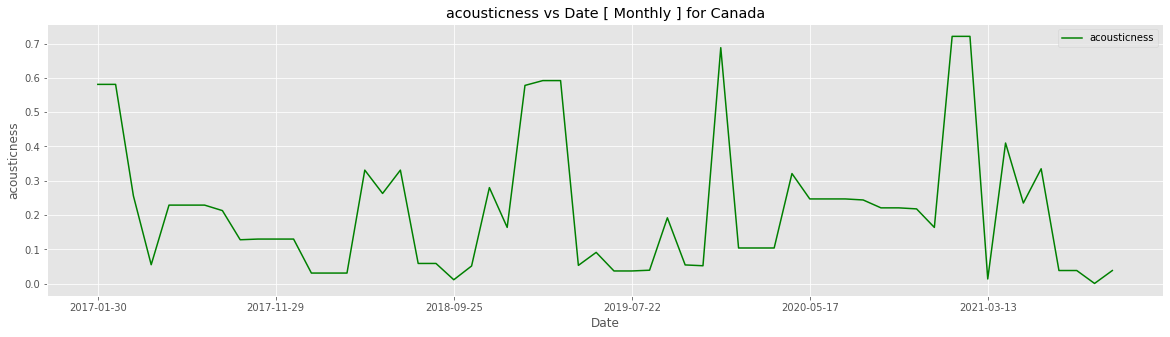

In [132]:
# Plot the trend for the audio features of a song in top200 over the years. 

region = input(">Enter Region: ")
feature = input(">Enter Feature: ")
rank_in_month = int(input(">Enter Rank to View Each Month: "))

var_df = df.copy(deep = True) 
var_df = var_df[var_df['region'] == region]
var_df = var_df[var_df['rank'] == rank_in_month]

var_df = var_df[['date', feature]]

var_df = var_df.drop_duplicates(subset = ["date"], keep = "first")
#var_df.set_index("date", inplace = True )

# Keeping only every rank_in_month song (for every month) in var_df.
count = 0
for index, row in var_df.iterrows():
    count += 1
    if count % 30 !=0:
        var_df.drop(index, inplace=True)

#var_df.plot(figsize=(20,5), color = 'green', kind = 'scatter',x='date',y='streams')
var_df.plot(figsize=(20,5), color = 'green', x='date', y = feature)
title = feature + " vs Date [ Monthly ] for " + region
plt.title(title)
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend(loc='best')
plt.show()


#### ARIMA

In [212]:
region = input(">Enter Region: ")
feature = input(">Enter Feature: ")
rank_in_month = int(input(">Enter Rank to View Each Month: "))

var_df = df.copy(deep = True) 
var_df = var_df[var_df['region'] == region]
var_df = var_df[var_df['rank'] == rank_in_month]

var_df = var_df[['date', feature]]

var_df = var_df.drop_duplicates(subset = ["date"], keep = "first")
#var_df.set_index("date", inplace = True )

# Keeping only every rank_in_month song (for every month) in var_df.
count = 0
for index, row in var_df.iterrows():
    count += 1
    if count % 30 !=0:
        var_df.drop(index, inplace=True)

>Enter Region: Canada
>Enter Feature: acousticness
>Enter Rank to View Each Month: 1


In [213]:
var_df.set_index("date", inplace = True )
var_df.head(10)

,acousticness
date,
2017-01-30,0.5810
2017-03-01,0.5810
2017-03-31,0.2560
2017-04-30,0.0552
2017-06-01,0.2290
2017-07-02,0.2290
2017-08-01,0.2290
2017-08-31,0.2130
2017-09-30,0.1280


In [214]:
# Intercept for ARIMA model. 

res1 = pm.auto_arima(var_df,start_p=1,start_q=1, max_p=5, max_q=5,information_criterion='aic', seasonal_test = 'df',
                        stepwise=True,trace=True)
print(res1)
print(res1.predict())
# Intercept (1,0,0)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-23.615, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-20.976, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-25.578, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-24.978, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.456, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-23.636, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-21.600, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12.983, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.594 seconds
 ARIMA(1,0,0)(0,0,0)[0] intercept
[0.15710859 0.19723526 0.21078772 0.21536496 0.21691089 0.21743301
 0.21760936 0.21766892 0.21768903 0.21769583]


Train Set             acousticness
date                    
2017-01-30        0.5810
2017-03-01        0.5810
2017-03-31        0.2560
2017-04-30        0.0552
2017-06-01        0.2290
2017-07-02        0.2290
2017-08-01        0.2290
2017-08-31        0.2130
2017-09-30        0.1280
2017-10-30        0.1300
2017-11-29        0.1300
2017-12-29        0.1300
2018-01-28        0.0309
2018-02-27        0.0309
2018-03-29        0.0309
2018-04-28        0.3310
2018-05-28        0.2630
2018-06-27        0.3310
2018-07-27        0.0589
2018-08-26        0.0589
2018-09-25        0.0114
2018-10-25        0.0515
2018-11-24        0.2800
2018-12-24        0.1640
2019-01-23        0.5780
2019-02-22        0.5920
2019-03-24        0.5920
2019-04-23        0.0533
2019-05-23        0.0912
2019-06-22        0.0370
2019-07-22        0.0370
2019-08-21        0.0392
2019-09-20        0.1920
2019-10-20        0.0546
2019-11-19        0.0522
2019-12-19        0.6880
2020-01-18        0.1040
2020-02-17     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


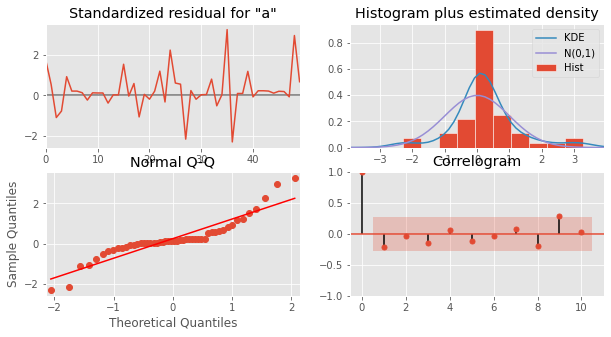

date
2017-01-30    0.000000
2017-03-01    0.472598
2017-03-31    0.472598
2017-04-30    0.208236
2017-06-01    0.044901
2017-07-02    0.186273
2017-08-01    0.186273
2017-08-31    0.186273
2017-09-30    0.173259
2017-10-30    0.104118
2017-11-29    0.105745
2017-12-29    0.105745
2018-01-28    0.105745
2018-02-27    0.025135
2018-03-29    0.025135
2018-04-28    0.025135
2018-05-28    0.269242
2018-06-27    0.213930
2018-07-27    0.269242
2018-08-26    0.047911
2018-09-25    0.047911
2018-10-25    0.009273
2018-11-24    0.041891
2018-12-24    0.227758
2019-01-23    0.133401
2019-02-22    0.470158
2019-03-24    0.481545
2019-04-23    0.481545
2019-05-23    0.043355
2019-06-22    0.074184
2019-07-22    0.030097
2019-08-21    0.030097
2019-09-20    0.031886
2019-10-20    0.156177
2019-11-19    0.044413
2019-12-19    0.042461
2020-01-18    0.559634
2020-02-17    0.084596
2020-03-18    0.084596
2020-04-17    0.084596
2020-05-17    0.261108
2020-06-16    0.200915
2020-07-16    0.200915
2020-0

In [215]:
# Splitting train and test. 

#Set training data before 2021
train = var_df[:'2021-03-01']
print("Train Set",train)
#Set test data starting 2021
test = var_df['2021-03-01':]
print("Test Set:",test)

pdq = (1,0,0)
pdq_seasonal = (0,0,0,0)

def model_fit_data(df, train, test):
  global pdq,pdq_seasonal
  res = SARIMAX(train, seasonal_order = pdq_seasonal, order = pdq).fit()
  print(res.summary())
  res.plot_diagnostics(figsize = (10,5))
  plt.show();
  return res
  
res = model_fit_data(var_df, train, test)
res.fittedvalues


<Figure size 1080x360 with 0 Axes>

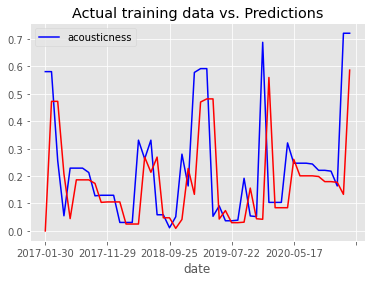

SARIMA RMSE : 0.20906530247498908


In [216]:
# Compare predicted and actual data on the training set. 

pred = res.predict()
rmse = sqrt(MSE(train,pred))
plt.figure(figsize=(15,5))
train.plot(label='Original',color='b')
pred.plot(label='Predicted Output',color='r')
plt.title('Actual training data vs. Predictions')
plt.show()
print("SARIMA RMSE :",rmse)

In [217]:
# Comparing predicted and actual data on the testing set.
def test_model(df,pdq,pdqs):
    X = df.values
    train, test = X[:50],X[50:]
    history = [x for x in train]
    predictions = []
  
    for test_point in range(len(test)):
        model = SARIMAX(history, order=pdq,seasonal_order=pdqs)
        modelf = model.fit(disp=0)
        predictions.append(modelf.forecast()[0])# One step forecast at a time
        history.append(test[test_point]) #"updates the history variable

    rmse = sqrt(MSE(test, predictions))
    print("SARIMA test RMSE:", rmse)
  
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(0, len(history[:51])), history[:51], 'g', label="train actual")
    plt.plot(np.arange(len(train), len(train) + len(test)), test, marker='.',color = "blue", label="test actual")
    plt.plot(np.arange(len(train), len(train) + len(test)), predictions, 'r', label="test pred")
    plt.ylabel('Acousticness')
    plt.xlabel('Step')
    plt.legend()
    plt.show();




/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA test RMSE: 0.2655237365383129


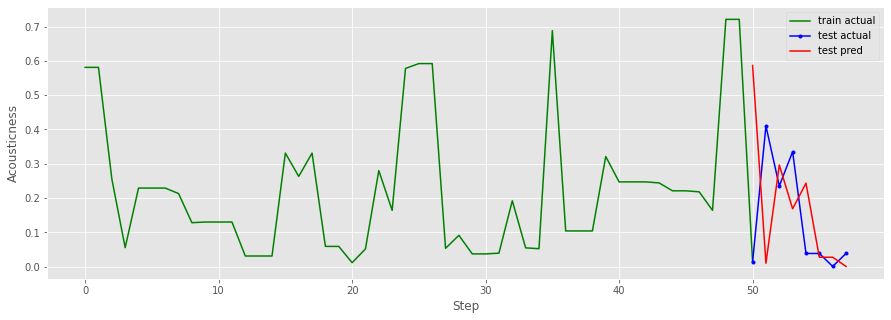

In [218]:
test_model(var_df, pdq, pdq_seasonal)

In [ ]:
var_df

#### LSTM

In [141]:
df = pd.read_csv('/content/drive/MyDrive/ML-Project/data/9countries/top200_9countries.csv')
df.head()

,Unnamed: 0,id,album,artist_x,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,title,rank,date,artist_y,region,chart,trend,streams,Unnamed: 0.1
0,1479,4Km5HrUvYTaSUfiSGPJeQR,Culture,"Migos, Lil Uzi Vert",True,75,0.927,0.665,11,-5.313,1,0.2440,0.061,0.000000,0.123,0.175,127.076,audio_features,5.719167,4,Bad and Boujee (feat. Lil Uzi Vert),1,2017-01-01,Migos,United States,top200,SAME_POSITION,1371493.0,NaN
1,6224,343YBumqHu19cGoGARUTsd,More Life,Drake,True,75,0.928,0.481,9,-9.350,0,0.2870,0.105,0.000000,0.176,0.613,134.007,audio_features,3.515617,4,Fake Love,2,2017-01-01,Drake,United States,top200,SAME_POSITION,1180074.0,NaN
2,7956,5aAx2yezTd8zXrkmtKl66Z,Starboy,"The Weeknd, Daft Punk",True,4,0.681,0.594,7,-7.028,1,0.2820,0.165,0.000003,0.134,0.535,186.054,audio_features,3.840883,4,Starboy,3,2017-01-01,"The Weeknd, Daft Punk",United States,top200,SAME_POSITION,1064351.0,NaN
3,10058,7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",False,85,0.748,0.524,8,-5.599,1,0.0338,0.414,0.000000,0.111,0.661,95.010,audio_features,4.082667,4,Closer,4,2017-01-01,"The Chainsmokers, Halsey",United States,top200,SAME_POSITION,1010492.0,NaN
4,14110,6fujklziTHa8uoM5OQSfIo,SremmLife 2 (Deluxe),"Rae Sremmurd, Gucci Mane",True,77,0.794,0.632,0,-6.163,1,0.0649,0.142,0.000000,0.128,0.355,145.926,audio_features,4.864883,4,Black Beatles,5,2017-01-01,"Rae Sremmurd, Gucci Mane",United States,top200,SAME_POSITION,874289.0,NaN


In [142]:
df.drop(['id', 'album', 'artist_x', 'artist_y', 'chart', 'trend', 'streams', 'Unnamed: 0.1', 'Unnamed: 0', 'explicit', 'type', 'title'], axis=1, inplace = True)

In [143]:
df.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'rank', 'date',
       'region'],
      dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171337 entries, 0 to 3171336
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   popularity        int64  
 1   danceability      float64
 2   energy            float64
 3   key               int64  
 4   loudness          float64
 5   mode              int64  
 6   speechiness       float64
 7   acousticness      float64
 8   instrumentalness  float64
 9   liveness          float64
 10  valence           float64
 11  tempo             float64
 12  duration_ms       float64
 13  time_signature    int64  
 14  rank              int64  
 15  date              object 
 16  region            object 
dtypes: float64(10), int64(5), object(2)
memory usage: 411.3+ MB


In [145]:
df = df.astype('float64', errors='ignore')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171337 entries, 0 to 3171336
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   popularity        float64
 1   danceability      float64
 2   energy            float64
 3   key               float64
 4   loudness          float64
 5   mode              float64
 6   speechiness       float64
 7   acousticness      float64
 8   instrumentalness  float64
 9   liveness          float64
 10  valence           float64
 11  tempo             float64
 12  duration_ms       float64
 13  time_signature    float64
 14  rank              float64
 15  date              object 
 16  region            object 
dtypes: float64(15), object(2)
memory usage: 411.3+ MB


In [147]:
df.head(5)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank,date,region
0,75.0,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,5.719167,4.0,1.0,2017-01-01,United States
1,75.0,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,3.515617,4.0,2.0,2017-01-01,United States
2,4.0,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165,0.000003,0.134,0.535,186.054,3.840883,4.0,3.0,2017-01-01,United States
3,85.0,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,4.082667,4.0,4.0,2017-01-01,United States
4,77.0,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,4.864883,4.0,5.0,2017-01-01,United States


In [148]:
df.isnull().sum()

popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
rank                0
date                0
region              0
dtype: int64

In [252]:
region = input(">Enter Region: ")
#feature = input(">Enter Feature: ")
rank_in_month = int(input(">Enter Rank to View Each Month: "))

var_df = df.copy(deep = True) 
var_df = var_df[var_df['region'] == region]
var_df = var_df[var_df['rank'] == rank_in_month]

#var_df = var_df[['date', feature]]

var_df = var_df.drop_duplicates(subset = ["date"], keep = "first")
#var_df.set_index("date", inplace = True )

# Keeping only every rank_in_month song (for every month) in var_df.
count = 0
for index, row in var_df.iterrows():
    count += 1
    if count % 30 !=0:
        var_df.drop(index, inplace=True)

>Enter Region: Canada
>Enter Rank to View Each Month: 1


In [253]:
var_df.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'rank', 'date',
       'region'],
      dtype='object')

In [254]:
var_df = var_df[['acousticness', 'energy', 'loudness', 'valence', 'date',"duration_ms"]]
#var_df  = var_df[['date','acousticness']]

In [255]:
var_df.set_index("date", inplace = True )

In [256]:
var_df.head(15)

,acousticness,energy,loudness,valence,duration_ms
date,,,,,
2017-01-30,0.5810,0.652,-3.183,0.931,3.895217
2017-03-01,0.5810,0.652,-3.183,0.931,3.895217
2017-03-31,0.2560,0.463,-11.377,0.364,4.982350
2017-04-30,0.0552,0.668,-4.284,0.811,4.810000
2017-06-01,0.2290,0.815,-4.328,0.813,3.813783
2017-07-02,0.2290,0.815,-4.328,0.813,3.813783
2017-08-01,0.2290,0.815,-4.328,0.813,3.813783
2017-08-31,0.2130,0.680,-6.378,0.497,3.530983
2017-09-30,0.1280,0.531,-6.631,0.141,3.638667


In [257]:
size_train = int(len(var_df) * 0.85)
size_test = len(var_df) - size_train

train, test = var_df.iloc[0:size_train], var_df.iloc[size_train:len(var_df)]

print("Shapes of the train and test datasets:",train.shape, test.shape)


Shapes of the train and test datasets: (49, 5) (9, 5)


In [258]:
def split(X, y):
    Xsplit, ysplit = [], []
    for iter in range(len(X) - 1):
        Xsplit.append(X.iloc[iter: (iter + 1)].to_numpy())
        ysplit.append(y.iloc[iter + 1])
    return np.array(Xsplit), np.array(ysplit)


In [259]:

X_train, y_train = split(train, train.acousticness)
X_test, y_test = split(test, test.acousticness)

In [260]:

print(X_train.shape)

(48, 1, 5)


In [261]:

print(X_train.shape)
model = None
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

(48, 1, 5)


In [262]:
hist = model.fit(
    X_train, y_train,
    epochs = 17,
    validation_split = 0.1,
    shuffle=False
)

Epoch 1/17
2/2 [==============================] - 2s 265ms/step - loss: 0.1867 - val_loss: 0.2367
Epoch 2/17
2/2 [==============================] - 0s 38ms/step - loss: 0.1402 - val_loss: 0.1835
Epoch 3/17
2/2 [==============================] - 0s 26ms/step - loss: 0.1101 - val_loss: 0.1399
Epoch 4/17
2/2 [==============================] - 0s 27ms/step - loss: 0.0851 - val_loss: 0.1052
Epoch 5/17
2/2 [==============================] - 0s 29ms/step - loss: 0.0660 - val_loss: 0.0800
Epoch 6/17
2/2 [==============================] - 0s 28ms/step - loss: 0.0572 - val_loss: 0.0636
Epoch 7/17
2/2 [==============================] - 0s 30ms/step - loss: 0.0729 - val_loss: 0.0527
Epoch 8/17
2/2 [==============================] - 0s 29ms/step - loss: 0.0526 - val_loss: 0.0470
Epoch 9/17
2/2 [==============================] - 0s 39ms/step - loss: 0.0417 - val_loss: 0.0441
Epoch 10/17
2/2 [==============================] - 0s 28ms/step - loss: 0.0481 - val_loss: 0.0426
Epoch 11/17
2/2 [===========

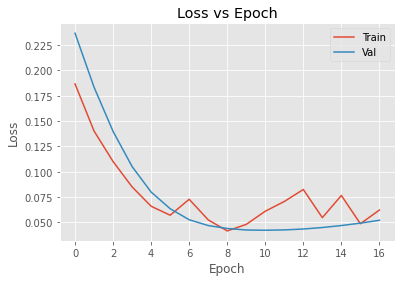

In [263]:


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [264]:
y_pred = model.predict(X_test)

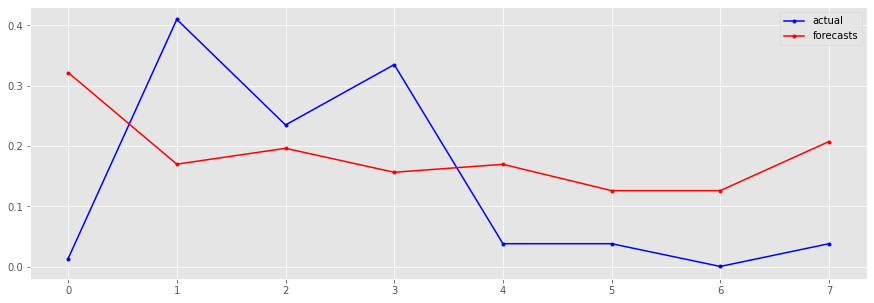

In [265]:
plt.figure(figsize=(15,5))
plt.plot(y_test, marker='.',color = "blue" ,label='actual')
plt.plot(y_pred, 'r',marker='.', label='forecasts')
plt.legend(loc = "best")
his = y_train
his = np.append(history,y_test[0])


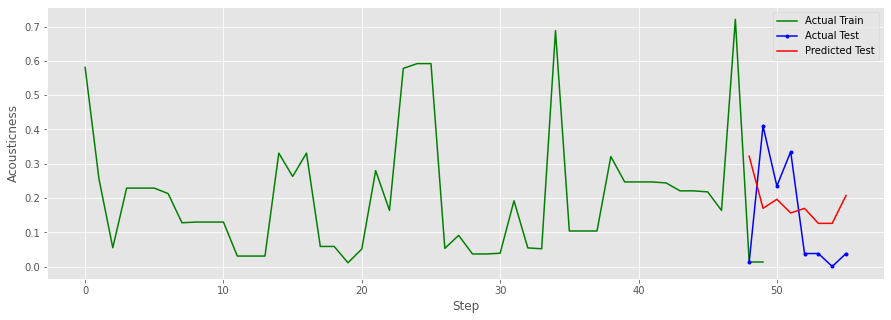

In [266]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, len(his)), his, 'g', label="Actual Train")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', color = "blue",label="Actual Test")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Predicted Test")
plt.ylabel('Acousticness')
plt.xlabel('Step')
plt.legend()
plt.show();


In [267]:
model = None
model = Sequential()

print(X_train.shape)
model.add(LSTM(units = 50, return_sequences = True,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))


model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

#model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))


model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split = 0.1, shuffle = False)

y_pred = model.predict(X_test)

(48, 1, 5)
Epoch 1/20
5/5 [==============================] - 8s 369ms/step - loss: 0.0643 - val_loss: 0.1161
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0524 - val_loss: 0.0958
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0420 - val_loss: 0.0753
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0316 - val_loss: 0.0572
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0335 - val_loss: 0.0474
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0336 - val_loss: 0.0460
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0321 - val_loss: 0.0496
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0329 - val_loss: 0.0540
Epoch 9/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0306 - val_loss: 0.0571
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0332 - val_loss: 0.0583
Epoch 11/20
5/5 [

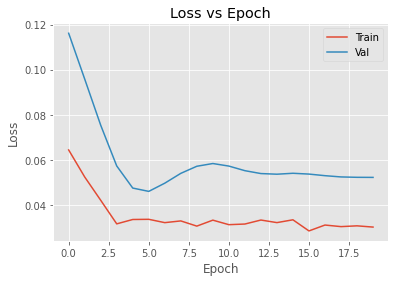

In [268]:
adv_his = history
plt.plot(adv_his.history['loss'])
plt.plot(adv_his.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

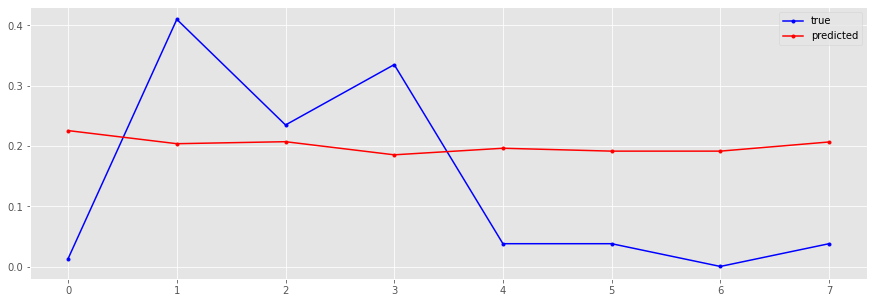

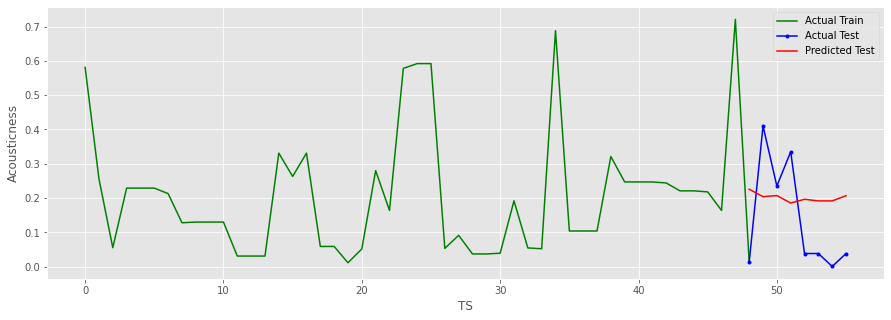

In [269]:
plt.figure(figsize=(15,5))
plt.plot(y_test, marker='.',color = "blue" ,label='true')
plt.plot(y_pred, 'r',marker='.', label='predicted')
plt.legend();
history = y_train
history = np.append (history,y_test[0])
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, len(history)), history, 'g', label="Actual Train")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', color = "blue",label="Actual Test")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Predicted Test")
plt.ylabel('Acousticness')
plt.xlabel('TS')
plt.legend()
plt.show();